<a href="https://colab.research.google.com/github/foster333/busta/blob/master/iscsdatascience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                      
    
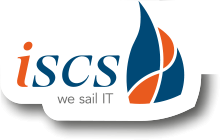


#                          **Esercitazione** **Big Data** 

---



# **Candidato:** **Fossi Hassan Youssouf**

# **1- Formulazione del problema e modello da usare** ***bold text***

Il compito da fare è quello di predire l'appartenenza delle structure ricettive ad una delle seguenti categorie: 
•	Hotel 1-3 stelle
•	Hotel 4 stelle e oltre
•	Bed & Breakfast
•	Campeggi
•	Case/appartamenti
Queste categorie sono quindi il nostro punto di arrivo significa che la variabile che gli contienne sara nostra variabile target. Il browsing del dataset ci fa vedere che c'è la variabile "OUTPUT" che esprime quelle osservazioni.  Mettendo tutto quello appena detto insieme, si vede che siamo di fronte ad un problema è dato un insieme di variabile indipendente e una variabile dipendente. Quindi siamo di fronte di supervised machien learning dov'è abbiamo come insieme di arrivo un insieme costituto da 5 variabili categoriche, possiamo quindi concludere che si tratta di un problema di multiclass classificazione. Tra il modelli a nostra disposizione faremo uso del modello di Random Forest Classifier, per la sua capicità di trattamento dei outliers, variabili nulli e per la sua efficacità relativa rispetto ad un classico decision tree.


# **2- Carichiamo le diverse Libraria da usare.**

In [ ]:
import pandas as pd # Per il dataframe
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # per divisione in train e test set.
from sklearn import metrics # peer la valutazione del modello
from matplotlib import pyplot as plt # per la rappresentazione grafica
from sklearn import tree 
import seaborn as sn #per la rappresentazione grafica
from matplotlib.legend_handler import HandlerLine2D
np.random.seed(100)#???

# **3-  Carico e lettura del dato**





In [ ]:
## Montiamo il dataset da Google drive a Colab 

path= "/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv"
''' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov'è puthon può andare a prendere i dato
 messo sotto "path".
 '''

' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov\'è puthon può andare a prendere i dato\n messo sotto "path".\n '

In [ ]:
# apriamo sotto un dataframe il file contenente i dati da usare.
df = pd.read_csv(path, sep='\t')

# **4-** **data glancing** 

In [ ]:
print(df.columns) # vediamo i nomi delle colone, le variabili.
#sotto abbiamo i nomi delle 24 variabili.

Index(['ID', 'PROVINCIA', 'COMUNE', 'LOCALITA', 'CAMERE', 'SUITE', 'LETTI',
       'BAGNI', 'PRIMA_COLAZIONE', 'IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO',
       'VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA',
       'ZONA_PERIFERICA', 'ZONA_STAZIONE_FS', 'ATTREZZATURE_VARIE',
       'CARTE_ACCETTATE', 'LINGUE_PARLATE', 'SPORT', 'CONGRESSI', 'LATITUDINE',
       'LONGITUDINE', 'OUTPUT'],
      dtype='object')


In [158]:
print(df.shape) # vediamo il numero di righe e colone del nostro dataframe
print(df.info()) # uno sguardo alla strutura del dato

(6775, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROVINCIA            6775 non-null   object 
 1   COMUNE               6775 non-null   object 
 2   CAMERE               6775 non-null   int64  
 3   SUITE                6775 non-null   int64  
 4   LETTI                6775 non-null   int64  
 5   BAGNI                6775 non-null   int64  
 6   PRIMA_COLAZIONE      6775 non-null   int64  
 7   IN_ABITATO           6775 non-null   float64
 8   SUL_LAGO             6775 non-null   float64
 9   VICINO_ELIPORTO      6775 non-null   float64
 10  VICINO_AEREOPORTO    6775 non-null   float64
 11  ZONA_CENTRALE        6775 non-null   float64
 12  VICINO_IMP_RISALITA  6775 non-null   float64
 13  ZONA_PERIFERICA      6775 non-null   float64
 14  ZONA_STAZIONE_FS     6775 non-null   float64
 15  ATTREZZATURE_VARIE   6775 n

Ci torna che il nostro dataset ha 6775 righe, osservazioni e 24 colone, variabili. C'è una coeherenza tra i tipo di carattere per ogni variabile e quello che ci si può aspettare. Possiamo già antecipare e notare l'esistenza dei valori manquanti per certe osservazioni, questo in numero ridotto per le variabili come "LONGITUDINE", "LATITUDINE" con 6728 non-nulli e in numero molto alto per le varibile come "CONGRESSI", "SPORT", "LOCALITA". 

In [ ]:
df.head(10) # facciamoci un idea del dataset guardando alle 10 prime righe di tutte le varibili.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,0,BS,PERTICA BASSA,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.373501,45.751381,B&B
1,1,BS,DESENZANO DEL GARDA,NaN,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.538947,45.469485,B&B
2,2,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.665355,45.704158,Case_Appartamenti
3,3,MN,MANTOVA,BOCCABUSA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",10.828175,45.165506,4_a_5_Stelle
4,4,MI,MILANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.151637,45.457177,Case_Appartamenti
5,5,LC,DERVIO,NaN,3,0,10,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Accesso a vetture pri...",NaN,"Inglese,Francese,Spagnolo",NaN,NaN,9.307951,46.076507,B&B
6,6,CR,CREMONA,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Biciclette per ospiti,Parco o giardino,Sala te...",NaN,NaN,NaN,NaN,10.028811,45.132638,B&B
7,7,BS,TREMOSINE,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.774328,45.793520,Case_Appartamenti
8,8,SO,LIVIGNO,NaN,8,0,25,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.136316,46.537801,Case_Appartamenti
9,9,MI,PERO,NaN,2,0,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Parco o giardino,Post...","American express,Visa,Master Card,Bancomat,Car...","Francese,Spagnolo",NaN,NaN,9.069780,45.519138,B&B


In [ ]:
df.tail(10) # ora facciamo la stessa cosa guardando le 10 ultime righe.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
6765,6765,MN,MONZAMBANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Accesso a vetture private,NaN,"Inglese,Francese,Tedesco",NaN,NaN,10.663781,45.400174,B&B
6766,6766,MI,MILANO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.196980,45.482605,Case_Appartamenti
6767,6767,BS,ISEO,NaN,1,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.056193,45.659818,B&B
6768,6768,BS,SIRMIONE,NaN,23,0,44,23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Bar,Giochi per bambini,Parco o giardino,Accett...","American express,Visa,Master Card","Inglese,Francese,Tedesco",Piscina scoperta,NaN,10.605859,45.497071,1_a_3_Stelle
6769,6769,BG,BERGAMO,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.659076,45.688413,Case_Appartamenti
6770,6770,MI,MILANO,NaN,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,NaN,Inglese,NaN,NaN,9.155438,45.473103,Case_Appartamenti
6771,6771,MI,MILANO,NaN,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.187997,45.461061,Case_Appartamenti
6772,6772,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.668696,45.690735,Case_Appartamenti
6773,6773,BG,RIVA DI SOLTO,NaN,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",NaN,NaN,NaN,NaN,10.038911,45.779892,Case_Appartamenti
6774,6774,SO,CAMPODOLCINO,Fraciscio,4,0,20,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.366251,46.405137,Case_Appartamenti


Guardando alle prime 10 righe e le ultime 10 righe possiamo vedere che la variabile "OUTPUT" contienne le osservazioni "target", quindi l'"OUTPUT" è la nostra variabile dipendente versus tutte le altre variabili che formano i set di variabili indipendenti. 
C'è un conferma della presenza dei NaN.

In [ ]:
df.describe() # Vediamo un veloce riassunto della statistica descrittiva di tutte le variabili 

,ID,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,LATITUDINE,LONGITUDINE
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6728.000000,6728.000000
mean,3387.000000,16.261550,0.455646,35.002509,13.620517,0.101402,0.084883,0.053389,0.000600,0.028344,0.100630,0.003749,0.052190,0.072286,9.781580,45.687101
std,1955.918369,35.859435,3.592147,93.538492,29.174499,0.301883,0.278728,0.224825,0.024487,0.165967,0.300861,0.061121,0.222426,0.258980,0.648691,0.325087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.976468,41.327946
25%,1693.500000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.202952,45.479931
50%,3387.000000,4.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.676006,45.643643
75%,5080.500000,14.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.462731,45.813644
max,6774.000000,528.000000,110.000000,1816.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.818532,46.555713


In [ ]:
df.describe(include = "all")# ora vediamo la statistica descrittiva includendo gli eventuali valori nulli e NaN

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
count,6775.000000,6775,6775,567,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,6668.000000,4016,2070,3095,607,307,6728.000000,6728.000000,6775
unique,NaN,12,947,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2759,703,213,166,232,NaN,NaN,5
top,NaN,BS,MILANO,COLOMBARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accettazione animali domestici,Tutte,"Inglese,Francese",Piscina scoperta,"Numero sale congressi 1,Congressi capacita' Ma...",NaN,NaN,Case_Appartamenti
freq,NaN,2105,1018,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,486,603,101,6,NaN,NaN,2910
mean,3387.000000,NaN,NaN,NaN,16.261550,0.455646,35.002509,13.620517,0.101402,0.084883,0.053389,0.000600,0.028344,0.100630,0.003749,0.052190,0.072286,NaN,NaN,NaN,NaN,NaN,9.781580,45.687101,NaN
std,1955.918369,NaN,NaN,NaN,35.859435,3.592147,93.538492,29.174499,0.301883,0.278728,0.224825,0.024487,0.165967,0.300861,0.061121,0.222426,0.258980,NaN,NaN,NaN,NaN,NaN,0.648691,0.325087,NaN
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.976468,41.327946,NaN
25%,1693.500000,NaN,NaN,NaN,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,9.202952,45.479931,NaN
50%,3387.000000,NaN,NaN,NaN,4.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,9.676006,45.643643,NaN
75%,5080.500000,NaN,NaN,NaN,14.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.462731,45.813644,NaN


Il numero di ID= 6775 coincide con il numero totale delle osservazioni. 
il numero massimo: di camere per una struttura è di 528, di LETTI è di 1816.
c'è una varianza grande tra le strutture per quanto riguarda il numero di "LETTI" come le indica la std=93.538. Lasceremo gli eventuali problemi di outlier a nostro modello.
...


# **6- Data preprocessing**

In [ ]:
# Verifichiamo la presenza dei NaN per ciascuna variabile.
Na = pd.concat([df.isna().sum()], axis=1, keys=["null"])
print(Na[Na.sum(axis=1)>0])


                     null
LOCALITA             6208
IN_ABITATO            107
SUL_LAGO              107
VICINO_ELIPORTO       107
VICINO_AEREOPORTO     107
ZONA_CENTRALE         107
VICINO_IMP_RISALITA   107
ZONA_PERIFERICA       107
ZONA_STAZIONE_FS      107
ATTREZZATURE_VARIE   2759
CARTE_ACCETTATE      4705
LINGUE_PARLATE       3680
SPORT                6168
CONGRESSI            6468
LATITUDINE             47
LONGITUDINE            47


In [ ]:
df.reindex(columns=["ATTREZZATURE_VARIE", "CARTE_ACCETTATE", "LINGUE_PARLATE", "SPORT","CONGRESSI "]).fillna(0) Per non perdere
del df["LOCALITA"] 
del df["ID"]
del df["LATITUDINE"]
del df["LONGITUDINE"]
df

,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,OUTPUT
0,BS,PERTICA BASSA,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B&B
1,BS,DESENZANO DEL GARDA,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,B&B
2,BG,BERGAMO,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,Case_Appartamenti
3,MN,MANTOVA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",4_a_5_Stelle
4,MI,MILANO,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,MI,MILANO,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,NaN,Inglese,NaN,NaN,Case_Appartamenti
6771,MI,MILANO,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti
6772,BG,BERGAMO,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Case_Appartamenti
6773,BG,RIVA DI SOLTO,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",NaN,NaN,NaN,NaN,Case_Appartamenti


7- Analisi descrittiva 

7.1 Analisi **univariata**

count    6775.000000
mean        0.455646
std         3.592147
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       110.000000
Name: SUITE, dtype: float64


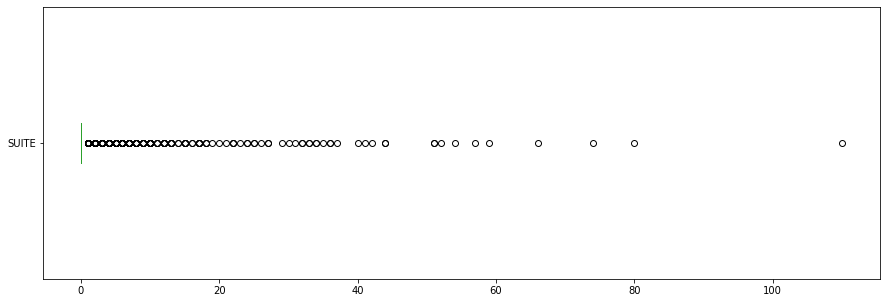

In [ ]:
print(df.SUITE.describe())
df.SUITE.plot(kind= "box", vert= False, figsize=(15, 5))

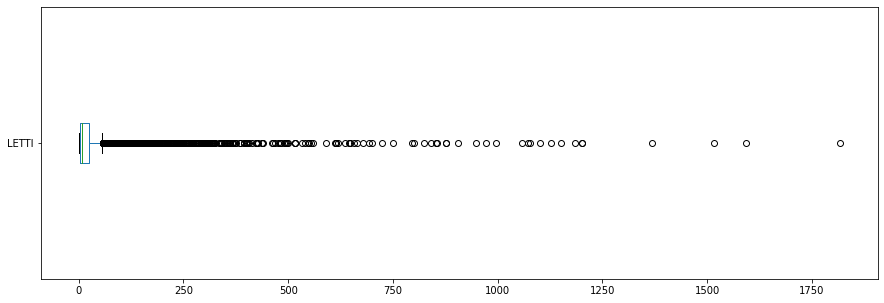

In [ ]:
df.LETTI.plot(kind= "box", vert= False, figsize=(15, 5))

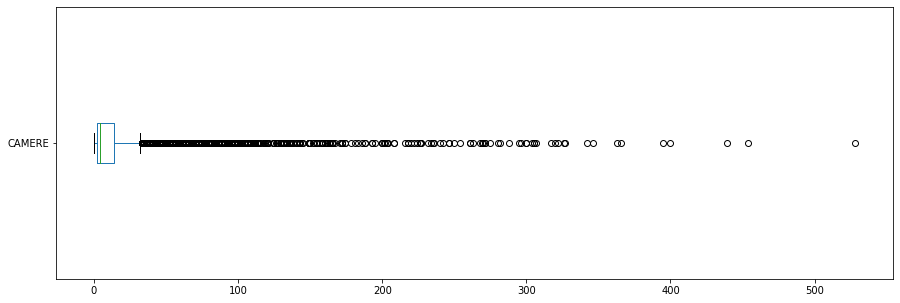

In [ ]:
df.CAMERE.plot(kind= "box", vert= False, figsize=(15, 5))

In [ ]:
print(df.OUTPUT.value_counts(normalize=True))

Case_Appartamenti    0.429520
B&B                  0.256384
1_a_3_Stelle         0.221993
4_a_5_Stelle         0.072177
Campeggio            0.019926
Name: OUTPUT, dtype: float64


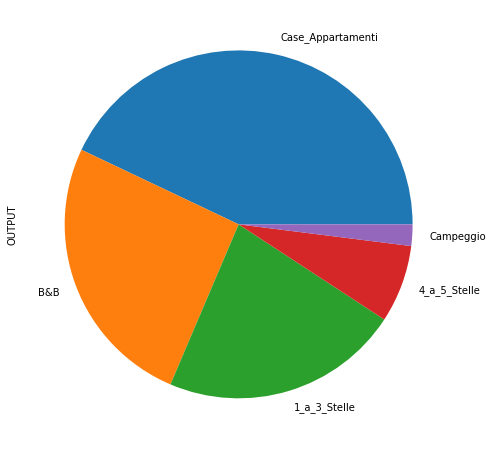

In [ ]:
df.OUTPUT.value_counts().plot(kind= "pie", figsize=(8,8))

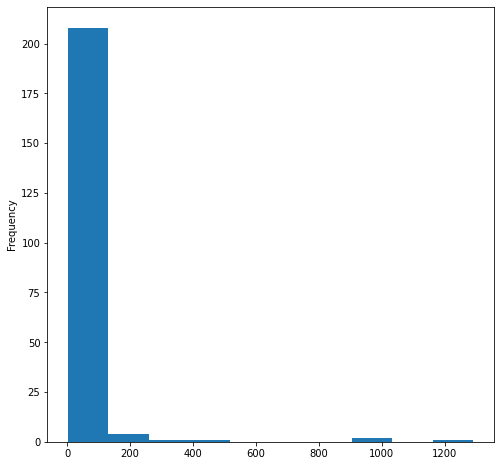

In [ ]:
df.CAMERE.value_counts().plot(kind= "hist", figsize=(8,8))

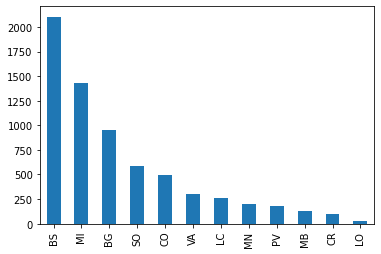

In [ ]:
df.PROVINCIA.value_counts().plot(kind= "bar")


6.2 Analisi multivariata

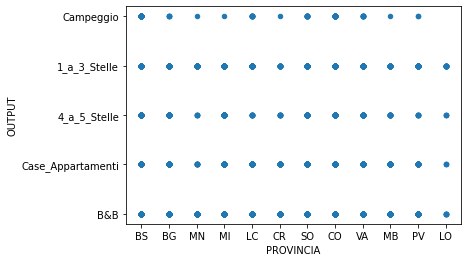

In [ ]:
df.plot.scatter("PROVINCIA", "OUTPUT")

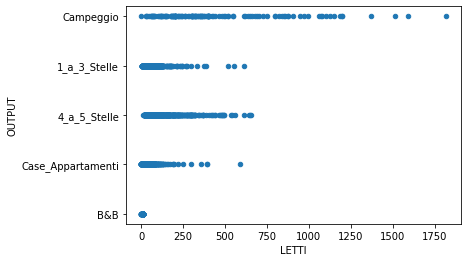

In [ ]:
df.plot.scatter("LETTI", "OUTPUT")

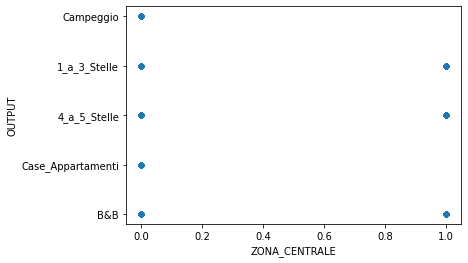

In [ ]:
df.plot.scatter("ZONA_CENTRALE", "OUTPUT")

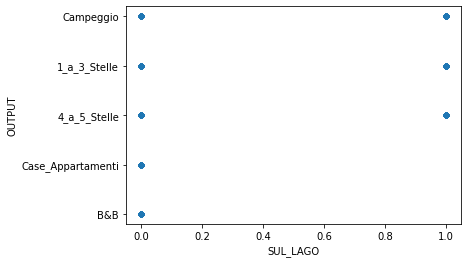

In [ ]:
df.plot.scatter("SUL_LAGO", "OUTPUT")

In [ ]:
# Verifichiamo l'esistenza di relazioni significative tra le variabili.
cor = df.corr()
cor

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS
CAMERE,1.000000,0.250814,0.943318,0.882555,0.139727,0.096112,0.310949,0.036273,0.042624,0.028147,0.020841,-0.023769,0.095739
SUITE,0.250814,1.000000,0.190559,0.320935,0.067926,0.005643,0.010170,0.047624,0.001124,0.047282,0.003678,-0.013804,0.052768
LETTI,0.943318,0.190559,1.000000,0.737654,0.082769,0.050983,0.358609,0.026375,0.022701,0.002642,0.012357,-0.026180,0.051113
BAGNI,0.882555,0.320935,0.737654,1.000000,0.202860,0.144252,0.187176,0.048113,0.067763,0.064303,0.031586,-0.010313,0.144369
PRIMA_COLAZIONE,0.139727,0.067926,0.082769,0.202860,1.000000,0.133854,0.107344,0.032223,0.040988,0.112958,0.044196,0.032333,0.062857
IN_ABITATO,0.096112,0.005643,0.050983,0.144252,0.133854,1.000000,0.001871,0.014515,-0.019593,-0.067891,0.095773,-0.059370,0.006413
SUL_LAGO,0.310949,0.010170,0.358609,0.187176,0.107344,0.001871,1.000000,-0.005818,-0.040562,-0.032872,-0.014569,-0.046730,-0.045683
VICINO_ELIPORTO,0.036273,0.047624,0.026375,0.048113,0.032223,0.014515,-0.005818,1.000000,-0.004184,0.012164,-0.001503,-0.005749,0.040465
VICINO_AEREOPORTO,0.042624,0.001124,0.022701,0.067763,0.040988,-0.019593,-0.040562,-0.004184,1.000000,0.132113,-0.010478,0.122448,0.234986
ZONA_CENTRALE,0.028147,0.047282,0.002642,0.064303,0.112958,-0.067891,-0.032872,0.012164,0.132113,1.000000,-0.020520,-0.076251,0.239660


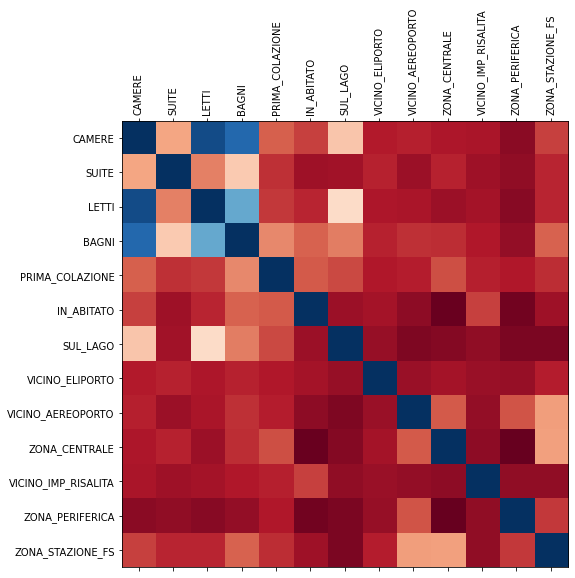

In [ ]:
# graficamente abbiamo,
fig = plt.figure(figsize=(8,8))
plt.matshow(cor, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(cor.columns)), cor.columns, rotation="vertical");
plt.yticks(range(len(cor.columns)), cor.columns);

Existono forte correlazioni tra le variabile come per esempio tra camere e letti e bagni, zona_centrale e zone periferica, sul_lago e zona_periferica.
Ma preferiamo non adjustare ne togliere nessun di queste variabile visto che il modello, random forest classifier da usare per il nostro compito di classificazione non avrà nessun problema di acuracy dovuto a questa situazione. 

In [ ]:
print(df.OUTPUT.unique())
propout= df["OUTPUT"].value_counts(sort=1)
propout  #???proportion

['B&B' 'Case_Appartamenti' '4_a_5_Stelle' '1_a_3_Stelle' 'Campeggio']


Case_Appartamenti    2910
B&B                  1737
1_a_3_Stelle         1504
4_a_5_Stelle          489
Campeggio             135
Name: OUTPUT, dtype: int64

In [ ]:
BB = ["B&B"]
Case = ['Case_Appartamenti']
quac = ['4_a_5_Stelle']
unods = ['1_a_3_Stelle']
Campeggio = ['Campeggio']
df[df.OUTPUT.isin(BB)] =1
df[df.OUTPUT.isin(Case)] =3
df[df.OUTPUT.isin(quac)] =5
df[df.OUTPUT.isin(unods)] =4
df[df.OUTPUT.isin(Campeggio)] =2
df.OUTPUT
df.head(20)

,PROVINCIA,COMUNE,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,OUTPUT
0,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1
2,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3
3,5,5,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5
4,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3
5,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1
7,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3
8,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3
9,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1


In [ ]:
Y =   df["OUTPUT"].values
Y = Y.astype("int")
Y

array([1, 1, 3, ..., 3, 3, 3])

In [ ]:
Y= df["OUTPUT"].values
Y

array([1, 1, 3, ..., 3, 3, 3], dtype=object)

In [ ]:
# let define the dependent variable Y and the independent variables X.
X = df.drop(labels=["OUTPUT"], axis=1)
print(df.head)


<bound method NDFrame.head of      PROVINCIA COMUNE  CAMERE  SUITE  ...  LINGUE_PARLATE  SPORT  CONGRESSI  OUTPUT
0            1      1       1      1  ...               1      1          1       1
1            1      1       1      1  ...               1      1          1       1
2            3      3       3      3  ...               3      3          3       3
3            5      5       5      5  ...               5      5          5       5
4            3      3       3      3  ...               3      3          3       3
...        ...    ...     ...    ...  ...             ...    ...        ...     ...
6770         3      3       3      3  ...               3      3          3       3
6771         3      3       3      3  ...               3      3          3       3
6772         3      3       3      3  ...               3      3          3       3
6773         3      3       3      3  ...               3      3          3       3
6774         3      3       3      3  ...     

In [ ]:
print(X)

     PROVINCIA COMUNE  CAMERE  ...  LINGUE_PARLATE  SPORT  CONGRESSI
0            1      1       1  ...               1      1          1
1            1      1       1  ...               1      1          1
2            3      3       3  ...               3      3          3
3            5      5       5  ...               5      5          5
4            3      3       3  ...               3      3          3
...        ...    ...     ...  ...             ...    ...        ...
6770         3      3       3  ...               3      3          3
6771         3      3       3  ...               3      3          3
6772         3      3       3  ...               3      3          3
6773         3      3       3  ...               3      3          3
6774         3      3       3  ...               3      3          3

[6775 rows x 20 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 20)
Y = Y.astype("int")
print(X_test)
Y_test

     PROVINCIA COMUNE  CAMERE  ...  LINGUE_PARLATE  SPORT  CONGRESSI
766          1      1       1  ...               1      1          1
1277         4      4       4  ...               4      4          4
2133         1      1       1  ...               1      1          1
2563         3      3       3  ...               3      3          3
3998         4      4       4  ...               4      4          4
...        ...    ...     ...  ...             ...    ...        ...
3200         3      3       3  ...               3      3          3
4696         3      3       3  ...               3      3          3
3763         1      1       1  ...               1      1          1
2506         3      3       3  ...               3      3          3
6192         3      3       3  ...               3      3          3

[2033 rows x 20 columns]


array([1, 4, 1, ..., 1, 3, 3])

In [ ]:
# creazione di un modello random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=30)# random state?
# fitting the model
model =model.fit(X_train, Y_train)
model
#len(model.estimators_)
#model.estimators_

RandomForestClassifier(random_state=30)

In [ ]:
# ora dobbiamo fare une predizione applicando il modello di classificazione "trainato" sul test set
Yhat = model.predict(X_test)
Yhat

array([1, 4, 1, ..., 1, 3, 3])

[Text(418.5, 475.65000000000003, 'X[10] <= 1.5\ngini = 0.692\nsamples = 2978\nvalue = [1198, 89, 2084, 998, 373]'),
 Text(279.0, 339.75, 'gini = 0.0\nsamples = 742\nvalue = [1198, 0, 0, 0, 0]'),
 Text(558.0, 339.75, 'X[13] <= 3.5\ngini = 0.563\nsamples = 2236\nvalue = [0, 89, 2084, 998, 373]'),
 Text(279.0, 203.85000000000002, 'X[5] <= 2.5\ngini = 0.079\nsamples = 1388\nvalue = [0, 89, 2084, 0, 0]'),
 Text(139.5, 67.94999999999999, 'gini = 0.0\nsamples = 56\nvalue = [0, 89, 0, 0, 0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 1332\nvalue = [0, 0, 2084, 0, 0]'),
 Text(837.0, 203.85000000000002, 'X[3] <= 4.5\ngini = 0.396\nsamples = 848\nvalue = [0, 0, 0, 998, 373]'),
 Text(697.5, 67.94999999999999, 'gini = 0.0\nsamples = 623\nvalue = [0, 0, 0, 998, 0]'),
 Text(976.5, 67.94999999999999, 'gini = 0.0\nsamples = 225\nvalue = [0, 0, 0, 0, 373]')]

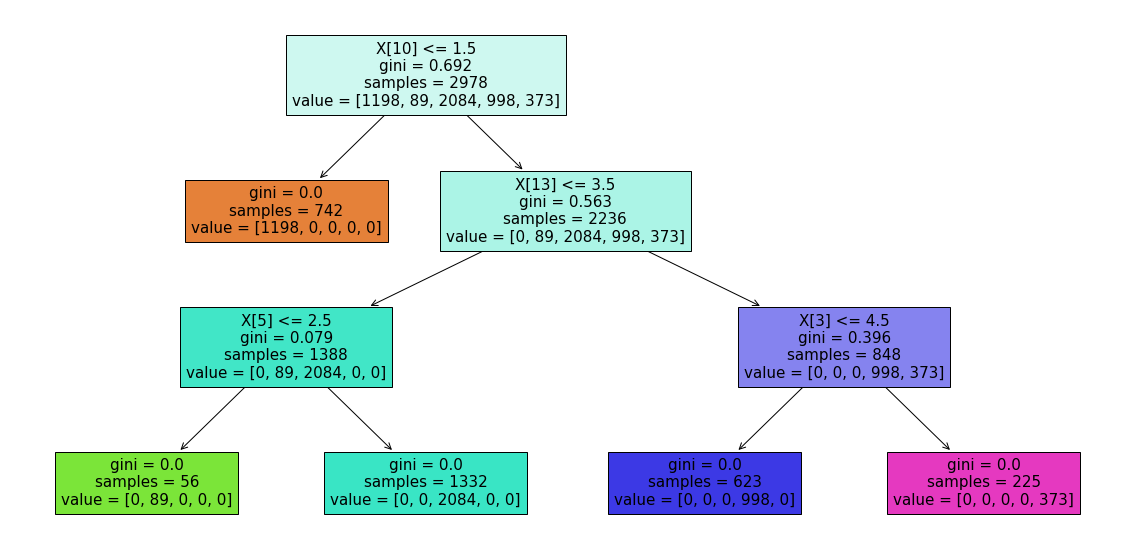

In [ ]:
# plot decision trees
plt.figure(figsize=(20, 10))
tree.plot_tree(model.estimators_[19], filled= True)

In [ ]:
for i in range (len(model.estimators_)):
  print(tree.export_text(model.estimators_[i]))

|--- feature_6 <= 1.50
|   |--- class: 0.0
|--- feature_6 >  1.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_18 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_18 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_0 >  3.50
|   |   |--- feature_16 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_16 >  4.50
|   |   |   |--- class: 4.0

|--- feature_18 <= 1.50
|   |--- class: 0.0
|--- feature_18 >  1.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_0 >  3.50
|   |   |--- feature_7 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_7 >  4.50
|   |   |   |--- class: 4.0

|--- feature_2 <= 1.50
|   |--- class: 0.0
|--- feature_2 >  1.50
|   |--- feature_9 <= 3.50
|   |   |--- feature_9 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_9 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_9 >  3.50
|   |   |--- feature_18 <= 4.50
|   |   | 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conmatr = confusion_matrix(Y_test, Yhat,)
score=accuracy_score(Y_test, Yhat)
print(conmatr)
print(score)

[[572   0   0   0   0]
 [  0  42   0   0   0]
 [  0   0 821   0   0]
 [  0   0   0 467   0]
 [  0   0   0   0 131]]
1.0


Text(69.0, 0.5, 'Truth')

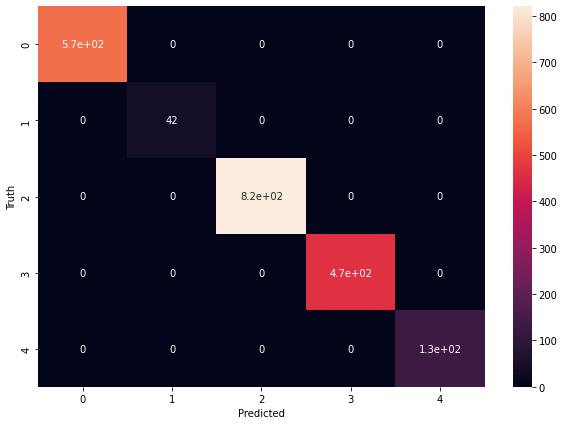

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(conmatr, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#  Vediamo quanto importante sono le variabili indipendenti nel nostro modello
Xvar = list(X.columns)
Ximp = pd.Series(model.feature_importances_, index = Xvar).sort_values(ascending=False)
Ximp


SPORT                  0.077558
PROVINCIA              0.072897
ZONA_PERIFERICA        0.067485
CAMERE                 0.065125
ZONA_CENTRALE          0.062269
ATTREZZATURE_VARIE     0.061605
COMUNE                 0.052840
BAGNI                  0.052665
IN_ABITATO             0.052389
CONGRESSI              0.052323
ZONA_STAZIONE_FS       0.049223
SUL_LAGO               0.046677
VICINO_AEREOPORTO      0.046262
VICINO_ELIPORTO        0.043990
LINGUE_PARLATE         0.042788
SUITE                  0.036952
LETTI                  0.032257
VICINO_IMP_RISALITA    0.030037
PRIMA_COLAZIONE        0.029421
CARTE_ACCETTATE        0.025238
dtype: float64